<center><h1><span style="color:#000058"> "1994 Census Salary Dataset" </span></h1> </center>

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [1]:
import pandas as pd
data = pd.read_csv('adult.csv')

In [2]:
data.shape

(32561, 15)

The dataset has 15 features and 32561 rows. Let's observe the first 5 rows of the dataset. 

In [5]:
data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K



### Data preprocessing

In [6]:
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)

The dataset has " ?" as missing values, replacing " ?" with NaNs

In [7]:
data = data[data != ' ?']

### Missing value report

In [74]:
def getMissingvalues(dataset,rownums=5):
    dataset1 = pd.DataFrame(dataset.isnull().sum(), columns = ["Number of missing data points"])
    dataset1['Percentage Missing values (%)'] = round((dataset1['Number of missing data points']/len(dataset))*100, 2)
    dataset1 = dataset1.sort_values(by=['Percentage Missing values (%)'], kind = 'quicksort', ascending=False)
    if dataset1.iloc[0, 0] > 0:
        return dataset1.head(rownums)
    else:
        return print("No Missing values in this dataset")
    
getMissingvalues(data)

,Number of missing data points,Percentage Missing values (%)
age,0,0.0
native-country_ Jamaica,0,0.0
native-country_ Ireland,0,0.0
native-country_ Iran,0,0.0
native-country_ India,0,0.0


"Occupation", "Workclass" and "Native Country" has some missing values, although the missing value percentage is less than 10%. 

### Exploratory Data Analysis

In [10]:
def hundred_bar(dataset, col1, col2, size1, size2): 
    import matplotlib.ticker as mtick
    import matplotlib.pyplot as plt
    import seaborn as sns
    dataset.groupby([col1, col2]).size().groupby(level=0).apply(
                                        lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',
                                        stacked=True)
    plt.rcParams["figure.figsize"] = (size1, size2)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    sns.set_style("ticks")
    sns.set_context("poster")
    sns.set_palette("GnBu_r",2)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
    plt.show() 

**Race ~ Salary**   : From graph we can see that ethnically White and Asian people are more likely to earn salary more than 50k as compared to other ethnicities. 

**Education~Salary** : Individual who acheived "PhD" and "Masters" degree are more likely to earn better than college droped out. 

**Gender ~ Salary**  : More males are having salary more than 50k than females.  

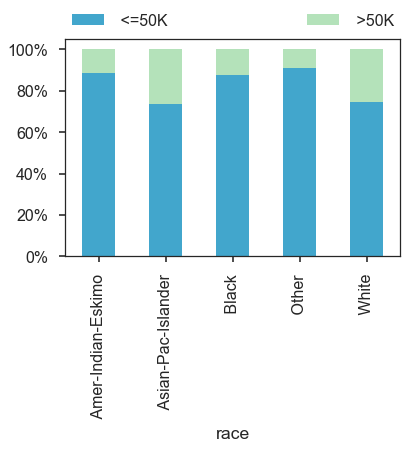

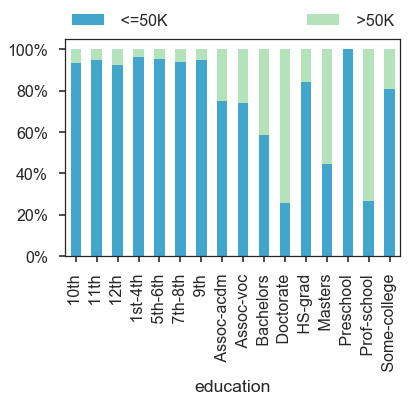

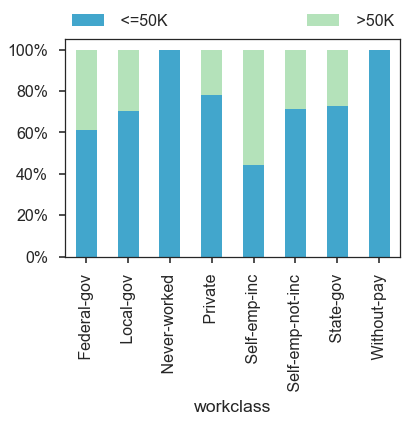

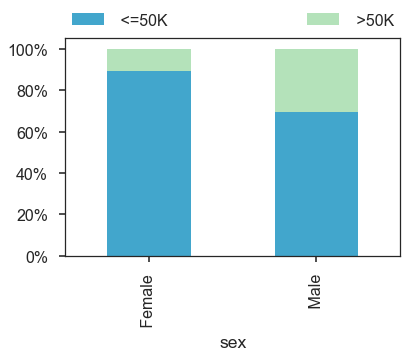

In [12]:
listOfgraphs = ["race", "education", "workclass", "sex"]
for i in range(len(listOfgraph)):
    hundred_bar(data, listOfgraph[i], "Salary", 6, 4)

In [13]:
def create_dummy_variables(dataset, list_of_varnames):
    dataset1 = pd.get_dummies(dataset[list_of_varnames])
    dataset = pd.concat([dataset, dataset1], axis =1)
    dataset.drop(list_of_varnames, axis = 1, inplace = True)
    return dataset

In [14]:
def numerical_variables(dataset):
    a = pd.DataFrame(dataset.select_dtypes(include=['float64','float32','int32','int64', 'uint8']).dtypes, columns = ["Data Type"])
    a['Number of levels'] = pd.DataFrame(dataset.select_dtypes(include=['float64','float32','int32','int64', 'uint8'])).nunique()
    return a

In [15]:
def numerical_data(dataset):
    return pd.DataFrame(dataset.select_dtypes(include=['float64','float32','int32','int64', 'uint8']))

In [16]:
def categorical_data(dataset):
    return pd.DataFrame(dataset.select_dtypes(include=['category', 'object', 'bool_']))

In [17]:
def categorical_variables(dataset):
    a = pd.DataFrame(dataset.select_dtypes(include=['category', 'object', 'bool_']).dtypes, columns = ["Data Type"])
    a['Number of levels'] = pd.DataFrame(dataset.select_dtypes(include=['category', 'object', 'bool_'])).nunique()
    return a

List of categorical variables in the dataset

In [19]:
categorical_variables(data)

,Data Type,Number of levels
workclass,object,8
education,object,16
marital-status,object,7
occupation,object,14
relationship,object,6
race,object,5
sex,object,2
native-country,object,41
Salary,object,2


List of Numerical Variables in the dataset

In [20]:
numerical_variables(data)

,Data Type,Number of levels
age,int64,73
fnlwgt,int64,21648
education-num,int64,16
capital-gain,int64,119
capital-loss,int64,92
hours-per-week,int64,94


Encoding and creating new dummy variables

In [21]:
data['Salary'] = data['Salary'].map({' <=50K':0, ' >50K':1})
data['sex'] = data['sex'].map({' Male':0, ' Female':1})

In [22]:
data = create_dummy_variables(data, ['marital-status', 'race', 'relationship', 'workclass', 'native-country'])

In [24]:
numerical_data1 = numerical_data(data)
numerical_variables(numerical_data1).head(10)

,Data Type,Number of levels
age,int64,73
fnlwgt,int64,21648
education-num,int64,16
sex,int64,2
capital-gain,int64,119
capital-loss,int64,92
hours-per-week,int64,94
Salary,int64,2
marital-status_ Divorced,uint8,2
marital-status_ Married-AF-spouse,uint8,2


In [25]:
numerical_data1.shape

(32561, 75)

So we have now 74 predictor variables to train to understand the effect of each or any variable on salary

### Calculate Highly Correlated Variables

In [3]:
def high_correlation(dataset, cutoff):
    while True:
        corr = dataset.corr().abs()
        corr = corr.unstack()
        corr = corr.sort_values(kind="quicksort", ascending = False)
        new_corr = corr[(corr > cutoff) & (corr <1.0) ]
        new_corr = pd.DataFrame(new_corr, columns= ["Pearson Correlation Coefficent"])
        return new_corr
    else:
        return print("The dataset might have categorical variables")

In [27]:
high_correlation(numerical_data1,0.7)

,,Pearson Correlation Coefficent
relationship_ Husband,marital-status_ Married-civ-spouse,0.893210
marital-status_ Married-civ-spouse,relationship_ Husband,0.893210
race_ White,race_ Black,0.788747
race_ Black,race_ White,0.788747


In [28]:
numerical_data1 = numerical_data1.drop(['relationship_ Husband'], axis =1)
# removing highly correlated variable 

Make "Salary" as binary predicting variable and rest as predictors. 

In [29]:
y = numerical_data1['Salary']
X = numerical_data1.drop(['Salary'], axis = 1)

#### Train-Test Split and Applying StandardScaler for feature scaling

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train_org))
X_test = pd.DataFrame(scaler.transform(X_test_org))

X_train.columns = X_train_org.columns

In [46]:
X_train.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,-0.334771,-1.261292,-0.423219,1.423243,-0.146349,5.136118,-2.309851,-0.396026,-0.028114,1.079683,...,-0.035072,-0.061183,-0.017528,-0.052227,-0.039217,-0.021974,-0.024792,0.345377,-0.048733,-0.022952
1,0.691223,0.510642,-0.035377,-0.702621,0.929742,-0.219921,-0.031295,-0.396026,-0.028114,1.079683,...,-0.035072,-0.061183,-0.017528,-0.052227,-0.039217,-0.021974,-0.024792,0.345377,-0.048733,-0.022952
2,-1.140909,-1.261841,-0.035377,-0.702621,-0.146349,-0.219921,-0.845065,-0.396026,-0.028114,1.079683,...,-0.035072,-0.061183,-0.017528,-0.052227,-0.039217,-0.021974,-0.024792,0.345377,-0.048733,-0.022952
3,1.277505,0.622115,-0.423219,1.423243,-0.146349,-0.219921,-0.031295,2.525085,-0.028114,-0.926197,...,-0.035072,-0.061183,-0.017528,-0.052227,-0.039217,-0.021974,-0.024792,0.345377,-0.048733,-0.022952
4,-1.580621,1.018212,-1.198902,1.423243,-0.146349,-0.219921,-2.553982,-0.396026,-0.028114,-0.926197,...,-0.035072,-0.061183,-0.017528,-0.052227,-0.039217,-0.021974,-0.024792,0.345377,-0.048733,-0.022952


#### Function to plot Decision Region

In [31]:
from sklearn.decomposition import PCA
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC, LinearSVC
import matplotlib.gridspec as gridspec
import itertools


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
pdf = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2'])
x_a = pdf.values[:100,]
y_b = y_train.values[:100,]

def plot_decision(Xtrain, ytrain, Xfig, Yfig, title, model_name):    
    model_name.fit(Xtrain, ytrain)

    fig = plt.figure(figsize=(Xfig, Yfig))
    sns.set_style("whitegrid")
    sns.set_context("poster")

    fig = plot_decision_regions(X=x_a, y=y_b, clf=model_name, legend=3)
    plt.title(title)
    plt.show()

<center><h3><span style="color:#000058"> Decision Tree Algorithm </span></h3> </center>

Here we are trying to classify "Salary" variable using decision tree algorithm. The training accuracy is 100% and the testing accuracy is 80%. This suggests the current model has high variance issue, and model is not able to perform well in newer data. The classic example of "overfitting". 

Accuracy on training set: 1.000
Accuracy on test set: 0.807


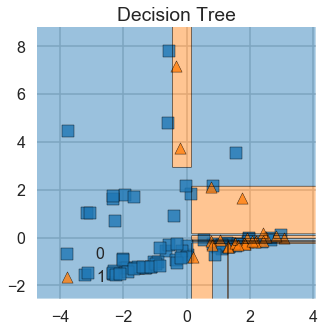

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

train_dtree = dtree.score(X_train, y_train)
test_dtree = dtree.score(X_test, y_test)

plot_decision(x_a, y_b, 5, 5, "Decision Tree", dtree)

<center><h3><span style="color:#000058"> Decision Tree with Bagging </span></h3> </center>

To improve the test model accuracy or reduce the variance (overfitting) we are applying bootstrap aggrigating algorithm 
also known as bagging. The accuracy of training dataset is 84% and testing dataset is 85%. Hence, we overcome the previous
high bias issue. 

Accuracy on training set: 0.848
Accuracy on test set: 0.851


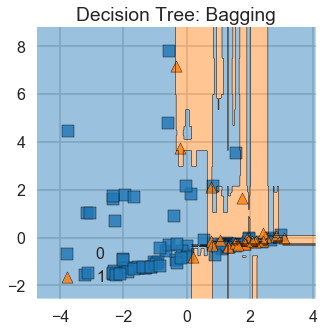

In [33]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(dtree, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(bag.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(bag.score(X_test, y_test)))

train_bag = bag.score(X_train, y_train)
test_bag = bag.score(X_test, y_test)

plot_decision(x_a, y_b, 5, 5, "Decision Tree: Bagging", bag)

<center><h3><span style="color:#000058"> Random Forest </span></h3> </center>

Our Model is stable and has low variance, but we would also like to improve its accuracy (if possible). To achieve this goal
we will train the "Random Forest " algorithm and we will also use GridSearchCV to tune the hyperparameters. By doing that we
achieved test data accuracy of 86% which is higher than the previous model and train data accuracy of 88% which is also higher
compared to bagging algorithm. 

In [35]:
#Random forest
 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params_rf = {
             'n_estimators': [200,300,400],
             'max_depth': [8,12,15]
             }
grid_rf = GridSearchCV(RandomForestClassifier(random_state=0),
                       param_grid=params_rf)

grid_rf.fit(X_train, y_train)

print("Tuned rb Parameters: {}".format(grid_rf.best_params_))
print("Best score is {}".format(grid_rf.best_score_))

Tuned rb Parameters: {'max_depth': 15, 'n_estimators': 400}
Best score is 0.8581519831519832


Accuracy on training set: 0.8808
Accuracy on test set: 0.8600


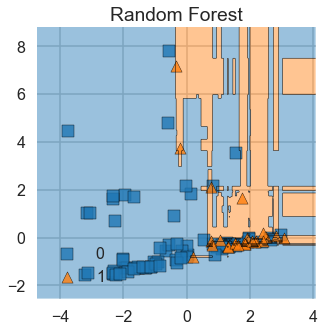

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=400, max_depth = 15, bootstrap=True, n_jobs=-1, random_state=0)

rf.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(rf.score(X_test, y_test)))

train_rf = rf.score(X_train, y_train)
test_rf = rf.score(X_test, y_test)

plot_decision(x_a, y_b, 5, 5, "Random Forest", rf)

<center><h3><span style="color:#000058"> Visualizing Train-Test accuracy </span></h3> </center>

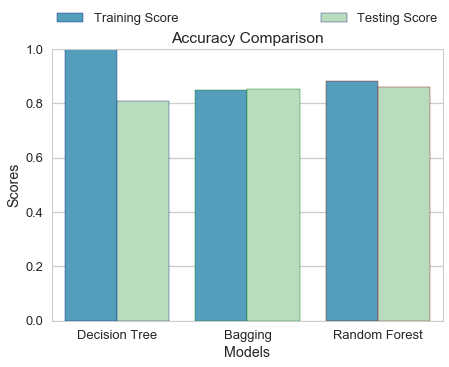

,Models,Type,Scores,Percentage Accuracy
0,Decision Tree,Training Score,0.999737,99.97%
1,Bagging,Training Score,0.848236,84.82%
2,Random Forest,Training Score,0.880792,88.08%
3,Decision Tree,Testing Score,0.806940,80.69%
4,Bagging,Testing Score,0.850957,85.1%
5,Random Forest,Testing Score,0.859965,86.0%


In [96]:
labels= ["Decision Tree", "Bagging", "Random Forest"]
Train_values_paste = [train_dtree, train_bag, train_rf]
Test_values_paste = [test_dtree, test_bag, test_rf]
d6 = {'Models':labels,  'Training Score': Train_values_paste, 'Testing Score': Test_values_paste,}
d6 = pd.DataFrame(d6)
df_ada = pd.melt(d6, id_vars = ['Models'], var_name='Type', value_name='Scores')
Scores_percentage1 = ((100. * df_ada['Scores']).round(2) ).astype(str) + '%'
df_ada['Percentage Accuracy'] = Scores_percentage1


import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(7,5))
sns.set_palette("GnBu_r",2)
g = sns.barplot(x="Models", y="Scores",hue = 'Type', data=df_ada,edgecolor=sns.color_palette('dark',7))
g.set_ylim(0, 1, 10)
sns.set_context("talk")
plt.legend(bbox_to_anchor=(0., 1.07, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.title('Accuracy Comparison')
plt.show()

df_ada

<center><h3><span style="color:#000058"> Identify the most important features </span></h3> </center>


The decision tree and random forest algorithms have fascility to visualize most important features to predict the salary outcome.
"Final weight", "maritial status", "education" and "age" are the most important features to predict salary outcome when trained
the decision tree. 
"Capital gain", "education", "marital-status" and "age" are the most important featurs to predict the salary outcome when trained the Random Forest algorithm. 

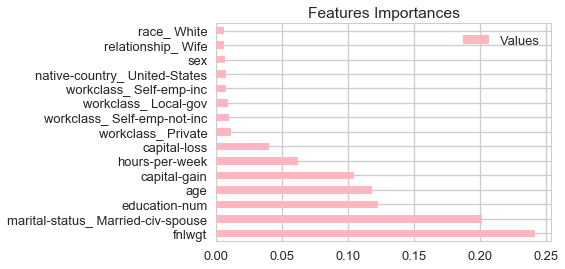

TOP FEATURES


,Values
fnlwgt,0.242113
marital-status_ Married-civ-spouse,0.201443
education-num,0.122859
age,0.118388
capital-gain,0.104656
hours-per-week,0.062127
capital-loss,0.040286
workclass_ Private,0.011256


In [66]:
# Create a pd.Series of features importances
importances = pd.DataFrame(data=dtree.feature_importances_,
                        index= X_train.columns, columns = ["Values"])

# Sort importances
importances_sorted = importances[importances["Values"] > 0.001].sort_values(by = "Values", ascending = False).head(15)

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightpink')
plt.title('Features Importances')
plt.show()
print("TOP FEATURES")
importances_sorted.head(8)

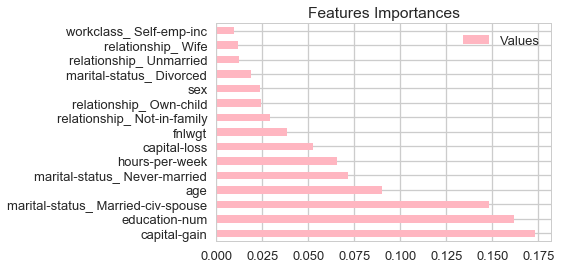

TOP FEATURES


,Values
capital-gain,0.173329
education-num,0.161910
marital-status_ Married-civ-spouse,0.148003
age,0.089864
marital-status_ Never-married,0.071373
hours-per-week,0.065722
capital-loss,0.052685
fnlwgt,0.038198


In [73]:
# Create a pd.Series of features importances
importances = pd.DataFrame(data=rf.feature_importances_,
                        index= X_train.columns, columns = ["Values"])

# Sort importances
importances_sorted = importances[importances["Values"] > 0.001].sort_values(by = "Values", ascending = False).head(15)

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightpink')
plt.title('Features Importances')
plt.show()
print("TOP FEATURES")
importances_sorted.head(8)